In [2]:
# I - : Importing  the library and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import joblib
from joblib import dump, load
from datetime import datetime
from keras.models import Sequential, Model,load_model
from keras.layers import Dropout,Dense
from keras import Input,layers
from keras.layers import LSTM, GRU,Bidirectional
from keras.layers import Conv1D,MaxPooling1D,GlobalMaxPooling1D
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,make_scorer
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.utils import plot_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,VotingRegressor,GradientBoostingRegressor
#from sklearn.externals import joblib
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.layers import Conv1D,MaxPooling1D,LSTM, GRU,Bidirectional,GlobalMaxPooling1D
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,make_scorer
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.python.keras.optimizers import TFOptimizer
#from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.utils import plot_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,StackingRegressor,VotingRegressor,GradientBoostingRegressor

Using TensorFlow backend.


In [3]:
# II - : Importing the training set
dataset=pd.read_csv("https://raw.githubusercontent.com/oreilly-mlsec/book-resources/599669c7124dffb65ea7f6e0b7626df32496b1d6/chapter3/datasets/cpu-utilization/cpu-full-b.csv", sep=",")

In [4]:
# III -  split of data Test & Training

# III.1 - : Size the data Test, Training
train_size=int(len(dataset)*.85)
test_size=int(len(dataset)*.15)
x_trainning,x_testing=dataset.iloc[0:train_size],dataset.iloc[(train_size+1):(train_size+test_size)]

In [5]:
# III.3 - : Preparing data for timesteps (lags)

def normalisationPreparationDonnee(data,lags):
    data=data['cpu'].values
    sc = MinMaxScaler(feature_range = (0, 1))
    #sc=StandardScaler()
    data1= data.reshape(-1,1)
    data2 = sc.fit_transform(data1)
    def preparation_data():
        x_train = []
        y_train = []
        for i in range(lags,len(data2)):
            x_train.append(data2[i-lags:i, 0])
            y_train.append(data2[i, 0])
        return np.array(x_train), np.array(y_train)
    x_train, y_train = preparation_data()
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    return x_train, y_train


In [6]:
# IV - TRAINING OF DIFFERENTS MODELS

lags=5

x_train, y_train = normalisationPreparationDonnee(x_trainning, lags)
x_test, y_test = normalisationPreparationDonnee(x_testing, lags)


In [7]:
# IV.6 - : Training of the hybrid model ConvNet1D - Bidirectional

#IV.6.1 - : Initialising of model hybrid ConvNet1D-Bidirectional


# Training of model - # forme (samples,time,features)
start=time()
modelConvNet1DBidirect = Sequential()
modelConvNet1DBidirect.add(Conv1D(100, kernel_size=1,activation='tanh',input_shape=(x_train.shape[1], 1)))
modelConvNet1DBidirect.add(Conv1D(128, kernel_size=1,activation='tanh'))
modelConvNet1DBidirect.add(MaxPooling1D(pool_size=2,strides=1,padding='same'))
modelConvNet1DBidirect.add(Conv1D(64, kernel_size=1,activation='tanh'))
modelConvNet1DBidirect.add(Bidirectional(LSTM(units = 128, return_sequences = True)))
modelConvNet1DBidirect.add(Bidirectional(LSTM(units = 64, return_sequences = True)))
modelConvNet1DBidirect.add(Bidirectional(LSTM(units = 32, return_sequences = True)))
modelConvNet1DBidirect.add(Bidirectional(LSTM(units = 64, return_sequences = True)))
modelConvNet1DBidirect.add(Bidirectional(LSTM(units = 128, return_sequences = True)))
modelConvNet1DBidirect.add(Bidirectional(LSTM(units = 100)))
modelConvNet1DBidirect.add(Dense(units = 1))
modelConvNet1DBidirect.compile(optimizer = 'rmsprop', loss = 'mean_squared_error',
              metrics=['accuracy'])

historyConvNet1DBidirect=modelConvNet1DBidirect.fit(x_train, y_train, 
                                                    epochs = 500, batch_size = 5,
                                                    validation_split=0.20,verbose=1)

elapsed=time()-start
print(modelConvNet1DBidirect.summary())
print('duree totale est de :',elapsed/60)
# 36 minutes


Train on 444 samples, validate on 112 samples
Epoch 1/500
444/444 [==============================] - 29s 66ms/sample - loss: 0.0361 - accuracy: 0.0068 - val_loss: 0.0072 - val_accuracy: 0.0000e+00
Epoch 2/500
444/444 [==============================] - 4s 8ms/sample - loss: 0.0149 - accuracy: 0.0068 - val_loss: 0.0376 - val_accuracy: 0.0000e+00
Epoch 3/500
444/444 [==============================] - 4s 9ms/sample - loss: 0.0115 - accuracy: 0.0068 - val_loss: 0.0867 - val_accuracy: 0.0000e+00
Epoch 4/500
444/444 [==============================] - 4s 8ms/sample - loss: 0.0115 - accuracy: 0.0068 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 5/500
444/444 [==============================] - 4s 8ms/sample - loss: 0.0102 - accuracy: 0.0068 - val_loss: 0.0074 - val_accuracy: 0.0000e+00
Epoch 6/500
444/444 [==============================] - 4s 8ms/sample - loss: 0.0092 - accuracy: 0.0068 - val_loss: 0.0035 - val_accuracy: 0.0000e+00
Epoch 7/500
444/444 [==============================] - 4s 

In [8]:
# IV.6.2 - :  Saving and importing the model
modelConvNet1DBidirect.save('modelConvNet1DBidirectProj.h5') 
#creates a HDF5 file 'my_model.h5' et model = load_model('modelRnnLSTMProjetSecurite.h5')
# pour le detruire del model  # deletes the existing model
modelConvNet1DBidirect = load_model('modelConvNet1DBidirectProj.h5')

In [20]:
#  IV.1.4 - : Calculating Errors and Viewing Model Fits
# on Training and Test data(identical reference for all methods)

def ErreurPrediction(Nommodele,data,prediction ):
    print('La R^2-Squared(r2_score) du modèle {} est : {}'.format(Nommodele,r2_score(data,prediction)))
    print('La MAE modèle {} est de: {} '.format(Nommodele,mean_absolute_error(data,prediction)))
    print('La MSE modèle {} est de: {} '.format(Nommodele,mean_squared_error(data,prediction)))
    print('RMSE est:{}'.format(np.sqrt(mean_squared_error(data,prediction))))
   

def LossAccuracy(nomDonnées,modelLSTM,x_test,y_test):
    score = modelLSTM.evaluate(x_test, y_test,verbose=0)
    erreur=modelLSTM.metrics_names
    print('Les pertes sur les données {} sont: '.format(nomDonnées))
    print("%s: %.2f%%" % (erreur[0], score[0]*100))
    print("%s: %.2f%%" % (erreur[1], score[1]*100))


#  IV.1.5 - : Viewing two-by-two graphs

def Affichage(historylstm,modelLSTM,Nommodele):
    y_pred_train=modelLSTM.predict(x_train)
    y_pred_test=modelLSTM.predict(x_test)
    plt.figure(figsize=(18,10))
    plt.subplot(1,3,1)
    plt.plot(historylstm.history['loss'],'b',label='Entrainement')
    plt.plot(historylstm.history['val_loss'],'green',label='Validation')
    plt.title('Perte Modèle {}'.format(Nommodele))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Entrainement', 'Validation'], loc='upper left')
    plt.subplot(1,3,2)
    plt.plot(y_train, color = 'green', label = 'Données réelles en % CPU')
    plt.plot(y_pred_train, color = 'blue', label = 'Prédiction du modèle {}'.format(Nommodele))
    plt.title('Modèle {} : Data training'.format(Nommodele))
    plt.xlabel('Temps')
    plt.ylabel('% CPU')
    plt.legend()
    plt.subplot(1,3,3)
    plt.plot(y_test, color = 'green', label = 'Données réelles en % CPU')
    plt.plot(y_pred_test, color = 'blue', label = 'Prédiction du modèle {} '.format(Nommodele))
    plt.title('Modèle {} :Data test'.format(Nommodele))
    plt.xlabel('Temps')
    plt.ylabel('% CPU')
    plt.legend()
    
def Affichage_Model(modelLSTM,NomDumodele):
    y_pred_train=modelLSTM.predict(x_train)
    y_pred_test=modelLSTM.predict(x_test)
    plt.figure(figsize=(18,7))
    plt.subplot(1,2,1)
    plt.plot(y_train, color = 'green', label = 'Données réelles en % CPU')
    plt.plot(y_pred_train, color = 'blue', label = 'Prédiction du modèle {}'.format(NomDumodele))
    plt.title('Modèle {} : Data training'.format(NomDumodele))
    plt.xlabel('Temps')
    plt.ylabel('% CPU')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(y_test, color = 'green', label = 'Données réelles en % CPU')
    plt.plot(y_pred_test, color = 'blue', label = 'Prédiction du modèle {} '.format(NomDumodele))
    plt.title('Modèle {} :Data Test'.format(NomDumodele))
    plt.xlabel('Temps')
    plt.ylabel('% CPU')
    plt.legend()

La R^2-Squared(r2_score) du modèle Erreur données Entrainement est : 0.976888817124438
La MAE modèle Erreur données Entrainement est de: 0.016902240986056867 
La MSE modèle Erreur données Entrainement est de: 0.001433921961377476 
RMSE est:0.037867162045464614
La R^2-Squared(r2_score) du modèle Erreur données test est : 0.7836586442507442
La MAE modèle Erreur données test est de: 0.07987640313746924 
La MSE modèle Erreur données test est de: 0.016822333338088406 
RMSE est:0.12970093807713345
Les pertes sur les données enrainement sont: 
loss: 0.14%
accuracy: 0.54%
Les pertes sur les données Test sont: 
loss: 1.68%
accuracy: 5.38%


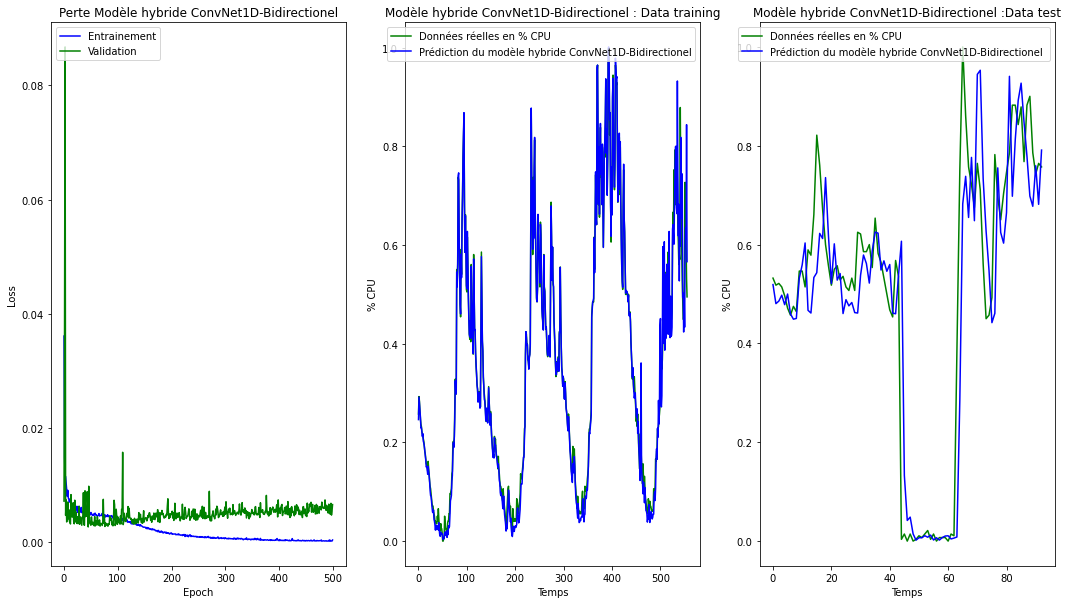

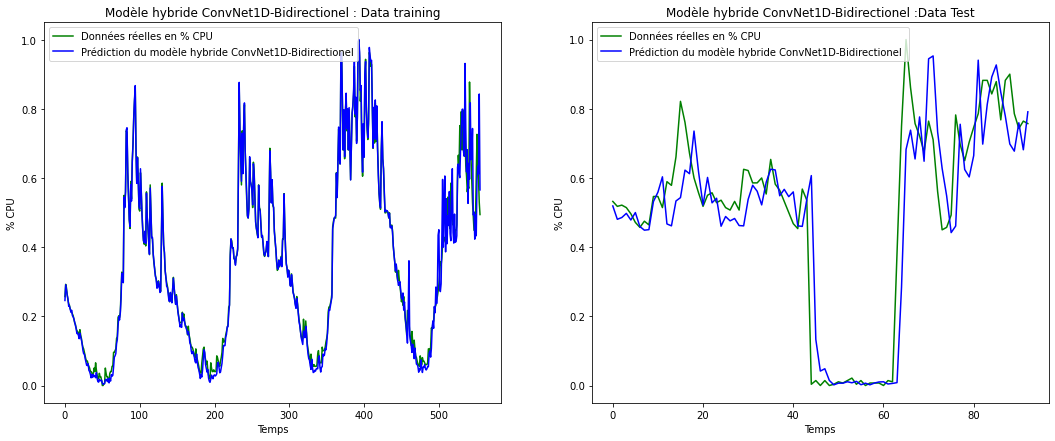

In [21]:
# IV.6.3 - : Calculation of errors & Plot training & validation accuracy values

ErreurPrediction("Erreur données Entrainement",y_train,modelConvNet1DBidirect.predict(x_train))
ErreurPrediction("Erreur données test",y_test,modelConvNet1DBidirect.predict(x_test))

LossAccuracy("enrainement",modelConvNet1DBidirect,x_train,y_train)
LossAccuracy("Test", modelConvNet1DBidirect,x_test,y_test)
Affichage(historyConvNet1DBidirect,modelConvNet1DBidirect,"hybride ConvNet1D-Bidirectionel")
Affichage_Model(modelConvNet1DBidirect,"hybride ConvNet1D-Bidirectionel")